# Predict the chance of survivial for Titanic passenger giving his info
# Part 1: Cleaning the Dataset

In [14]:
# add imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load the data
titanic = pd.read_csv('../../../titanic.csv')


print(titanic.shape)
print(titanic.loc[0])
titanic.head()

(891, 12)
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# check Null values in the data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# replace null Age values with mean
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [20]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

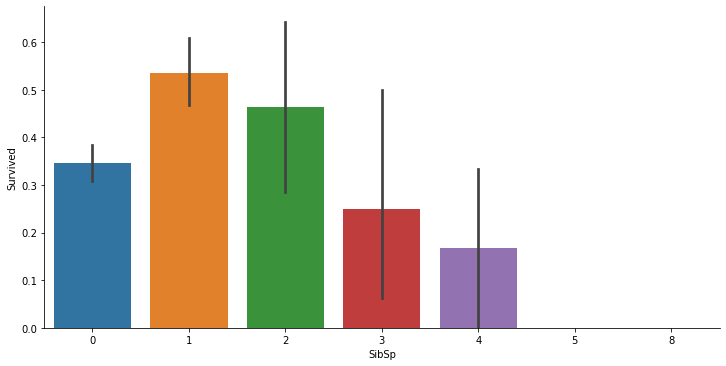

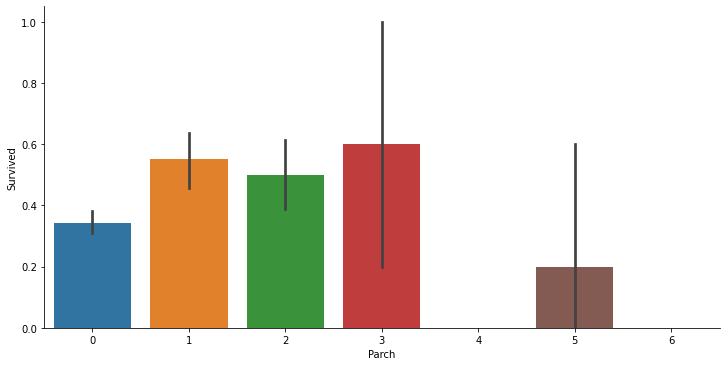

In [40]:
for i,col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='bar',aspect=2)


In [41]:
titanic['Family_cnt']=titanic['SibSp']+titanic['Parch']

In [42]:
titanic.drop(['SibSp', 'Parch','PassengerId'], axis=1,inplace=True)

In [43]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


In [44]:
titanic.drop(['Name'],axis=1,inplace=True)
titanic.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,female,35.000000,113803,53.1000,C123,S,1
4,0,3,male,35.000000,373450,8.0500,NaN,S,0
5,0,3,male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,male,54.000000,17463,51.8625,E46,S,0
7,0,3,male,2.000000,349909,21.0750,NaN,S,4
8,1,3,female,27.000000,347742,11.1333,NaN,S,2
9,1,2,female,14.000000,237736,30.0708,NaN,C,1


In [45]:
titanic.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [54]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()


Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [55]:
titanic.groupby(titanic['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [59]:
titanic.groupby(by=["Sex"])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [65]:
titanic.groupby(by=["Embarked"],dropna=False)['Survived'].mean()

Embarked
C      0.553571
Q      0.389610
S      0.336957
NaN    1.000000
Name: Survived, dtype: float64

In [67]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)

In [68]:
titanic.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,male,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,female,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,female,35.000000,113803,53.1000,C123,S,1,1
4,0,3,male,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,male,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,male,54.000000,17463,51.8625,E46,S,0,1
7,0,3,male,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,female,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,female,14.000000,237736,30.0708,NaN,C,1,0


In [69]:
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,0,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,1,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,1,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,1,35.000000,113803,53.1000,C123,S,1,1
4,0,3,0,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,0,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,0,54.000000,17463,51.8625,E46,S,0,1
7,0,3,0,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,1,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,1,14.000000,237736,30.0708,NaN,C,1,0


In [70]:
titanic.groupby(titanic['Sex']).sum()

,Survived,Pclass,Age,Fare,Family_cnt,Cabin_ind
Sex,,,,,,
0,109,1379,17601.860588,14727.2865,384,107
1,233,678,8860.053235,13966.6628,422,97


In [72]:
titanic['Age'] = titanic['Age'].round(1)
titanic.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,1,35.0,113803,53.1000,C123,S,1,1
4,0,3,0,35.0,373450,8.0500,NaN,S,0,0
5,0,3,0,29.7,330877,8.4583,NaN,Q,0,0
6,0,1,0,54.0,17463,51.8625,E46,S,0,1
7,0,3,0,2.0,349909,21.0750,NaN,S,4,0
8,1,3,1,27.0,347742,11.1333,NaN,S,2,0
9,1,2,1,14.0,237736,30.0708,NaN,C,1,0


In [75]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family_cnt', 'Cabin_ind'],
      dtype='object')

In [77]:
titanic.drop(['Cabin','Embarked','Ticket'],axis=1,inplace=True)

In [78]:
titanic.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0
5,0,3,0,29.7,8.4583,0,0
6,0,1,0,54.0,51.8625,0,1
7,0,3,0,2.0,21.0750,4,0
8,1,3,1,27.0,11.1333,2,0
9,1,2,1,14.0,30.0708,1,0


In [81]:
titanic.to_csv('../../../titanic_cleaned.csv', index=False)